# Improving Plot Aesthetics

The <a href='http://nces.ed.gov/programs/digest/2013menu_tables.asp'>Department of Education Statistics</a> releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled <a href='http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv'>here</a>. Here's a preview of the first few rows:

In [2]:
women_degrees.head(3)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.

In this mission and the next few missions, we'll explore how we can communicate the nuanced narrative of gender gap using effective data visualization. Let's first generate a standard matplotlib plot.

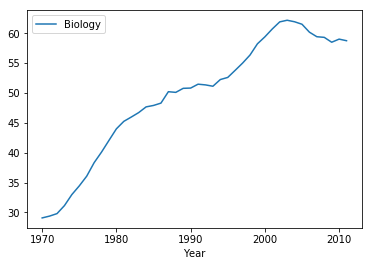

In [4]:
# generate a line chart that visualizes the historical percentage of biology degrees awarded to women
women_degrees.plot(x='Year', y='Biology')
plt.show()

From the plot, we can tell that Biology degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987.

If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

If we visualize the trend of Biology degrees awarded to men on the same plot, a viewer can observe the space between the lines for each gender. We can calculate the percentages of Biology degrees awarded to men by subtracting each value in the `Biology` column from `100`.

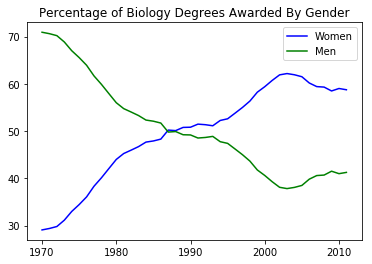

In [21]:
# create figure
fig, ax = plt.subplots()

# visualizes the percentages of Biology degrees awarded to women over time.
ax.plot(women_degrees.Year, women_degrees.Biology, c='blue', label='Women')

# visualizes the percentages of Biology degrees awarded to men over time
ax.plot(women_degrees.Year, 100-women_degrees.Biology, c='green', label='Men')

# Set title
ax.set_title("Percentage of Biology Degrees Awarded By Gender")

# Generate legend
ax.legend(loc='upper right')

plt.show()

To customize the appearance of the ticks, we use the `Axes.tick_params()` method. Using this method, we can modify which tick marks and tick labels are displayed. By default, matplotlib displays the tick marks on all four sides of the plot. Here are the four sides for a standard line chart:

- The left side is the y-axis.
- The bottom side is the x-axis.
- The top side is across from the x-axis.
- The right side is across from the y-axis.

To hide all of them, we need to pass in the following values for each parameter when we call `Axes.tick_params()`:

- `bottom: "off"`
- `top: "off"`
- `left: "off"`
- `right: "off"`